## Compare the ssGEMs size(gene/rxns) among strains from different clade
- 1.size comparison
- 2.common lost gene&reaction

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set work dir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# load ssGEM size data
df_model_size = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/tinit_ssGEMs_size.csv',index_col=0)
# remove .xml in index
df_model_size.index = df_model_size.index.str.replace('.xml','')
df_model_size

,gene_number,reaction_number,metabolite_number
CNF_4.re,1113,3997,2880
ACS_2.re,1123,3988,2882
CBA_3.re,1124,3987,2882
YBK.re,1116,3992,2880
CIT_3.re,1119,3996,2884
...,...,...,...
ACV_2.re,1124,4016,2880
AQQ_4.re,1122,3996,2884
CCL_1.re,1116,3986,2882
AGV_2.re,1121,4015,2882


In [3]:
# load strain info
df_strain_info = pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)
df_strain_info

df_model_size['type']=df_model_size.index.map(lambda x: df_strain_info.loc[x,'nature_clade'])

# remove type nan
df_model_size = df_model_size.dropna(subset=['type'])
df_model_size

wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# change all type in wildtypelist to wildtype
df_model_size['type'] = df_model_size['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)

# remove clade if it has less than 15 strains
df_model_size = df_model_size.groupby('type').filter(lambda x: len(x) >= 15)

# sort df_model_size by type,and set wildtype as the first
df_model_size = df_model_size.sort_values(by='type',ascending=False)
df_model_size

# save 
df_model_size.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/tinit_ssGEMs_size.csv')

C:\Users\wangh\AppData\Local\Temp\ipykernel_24696\3600394877.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_size['type'] = df_model_size['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)


M3. Mosaic region 3 0.00018110503092948123
8. Mixed origin  2.3597037875511508e-17
5. French dairy  1.947080882774229e-27
3. Brazilian bioethanol  6.555160988359165e-08
26. Asian fermentation  0.005907427030609902
25. Sake  3.692801201859863e-10
13. African palm wine  9.654267316119389e-08
10. French Guiana human  2.944114559177484e-10
1. Wine/European (subclade 3) 0.007004217843253476
1. Wine/European (subclade 1) 1.6732322191290766e-05
1. Wine/European  3.919872256951811e-06


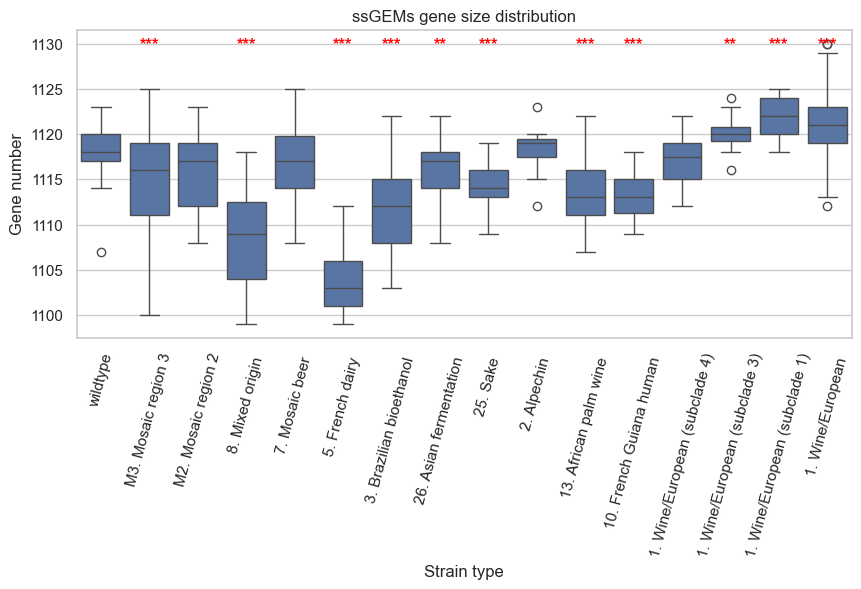

In [4]:
# plot size distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="gene_number", data=df_model_size)
plt.title('ssGEMs gene size distribution')
plt.ylabel('Gene number')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
# plt.show()
# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['gene_number'], df_model_size[df_model_size['type']=='wildtype']['gene_number']).pvalue
        if p < 0.05:
            print(t, p)
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_model_size['type'].unique().tolist().index(t), 1130, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()

M3. Mosaic region 3 0.005253267175305211
8. Mixed origin  6.062108922800536e-07
7. Mosaic beer  0.048675691368870656
5. French dairy  6.694600820718942e-12
3. Brazilian bioethanol  0.004787666142667739
13. African palm wine  3.571667053011953e-05
10. French Guiana human  1.066567363415345e-05
1. Wine/European (subclade 3) 0.001122390131018433


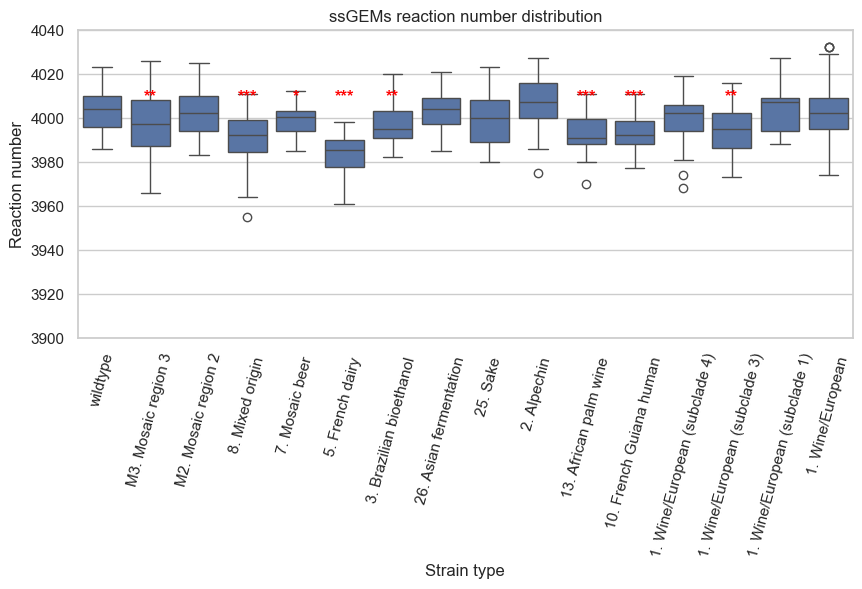

In [5]:
# plot reaction number distribution
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="reaction_number", data=df_model_size)
# violin plot
# sns.violinplot(x="type", y="reaction_number", data=df_model_size, palette="Set3")
plt.title('ssGEMs reaction number distribution')
plt.ylabel('Reaction number')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
plt.ylim(3900,4040)
# plt.show()

# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        if p < 0.05:
            print(t, p)
            # add * to the plot
            if p < 0.001:
                sig='***'
            elif p < 0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_model_size['type'].unique().tolist().index(t), 4010, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()

### 2.check the lost reaction in each strain

In [4]:
# load reaction matrix
rxnMatrix = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/tinit_ssGEMs_rxnMatrix.csv',index_col=0)
rxnMatrix.head()

,AAA_6.re,AAB_6.re,AAD_6.re,AAE_6.re,AAG_6.re,AAH_6.re,AAI_6.re,AAK_6.re,AAL_3.re,AAM_3.re,...,YCV.re,YDB.re,YDC.re,YDD.re,YDE.re,YDF.re,YDH.re,YDI.re,YDJ.re,YDK.re
r_0001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# set wildtype core reaction list as the reference to compare with other strains
ref_strainList=df_model_size[df_model_size['type']=='wildtype'].index.tolist()
ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
ref_rxnList=ref_rxnMatrix.index[ref_rxnMatrix.sum(axis=1)>=len(ref_strainList)*1].tolist()

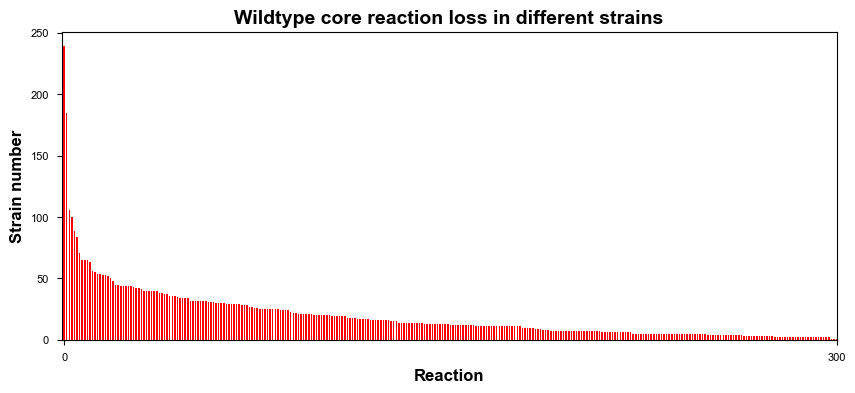

In [ ]:
refrxn_Matrix=rxnMatrix.loc[ref_rxnList,:]
# remove ref_strainList from rxnMatrix
refrxn_Matrix=refrxn_Matrix.drop(columns=ref_strainList)

# count 0 value frequence in each row
df_lost_count=refrxn_Matrix.apply(lambda x: len(x[x==0]),axis=1)
df_lost_count.sort_values(ascending=False,inplace=True)
# remove the reaction with 0 value frequence
df_lost_count=df_lost_count[df_lost_count!=0]

# plot lost reaction number as a bar plot
# set plot theme as scientific
plt.style.use('seaborn-v0_8-paper')
# set font style as Arial
plt.rcParams['font.sans-serif'] = ['Arial']
fig,ax=plt.subplots(figsize=(10,4))
# set bar width
width=0.6  # Adjust the width value here
df_lost_count.plot(kind='bar',ax=ax,color='red',width=width, align='center',edgecolor=None)
plt.title('Wildtype core reaction loss in different strains',fontsize=14,fontweight='bold')
plt.ylabel('Strain number',fontsize=12,fontweight='bold')
plt.xlabel('Reaction',fontsize=12,fontweight='bold')
# do not show x label
plt.xticks([])
# set x range
plt.xlim(-1,300)
# label 0 , 300 in x axis
plt.xticks([0,300],['0','300'],rotation=0)
plt.show()

In [8]:
# save df_lost_count
df_lost_count.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/tinit_allstrain_core_rxn_loss.csv')

In [9]:
from gseapy import barplot
import gseapy as gp
def enr_analysis(rxnList,pathway_dict,background,title='enrichment analysis'):
    enr=gp.enrichr(gene_list=rxnList,
                   gene_sets=pathway_dict,
                   background=background,
                   outdir=None,
                   no_plot=True)
    
    # plot
    try:
        ax=barplot(enr.res2d,
                column='Adjusted P-value',
                    title=title,cutoff=0.05,figsize=(4,2))
    except:
        print('No significant enrichment')
    return enr.res2d

# load pathway dict
import cobra
# model=cobra.io.read_sbml_model(r'model/panYeast.xml')
model=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
model_rxnlist=[i.id for i in model.reactions]
pathway_dict={}
for group in model.groups:
    name=group.name
    if 'Transport' in name:
        continue
    rxnIDlist=[rxn.id for rxn in group.members]
    pathway_dict[name]=rxnIDlist

# remove reactions that include 'Transport' in the rxn name
df_lost_count=df_lost_count[df_lost_count.index.isin(model_rxnlist)]
for i in df_lost_count.index:
    if 'transport' in model.reactions.get_by_id(i).name:
        df_lost_count=df_lost_count.drop(i)
    if 'exchange' in model.reactions.get_by_id(i).name:
        df_lost_count=df_lost_count.drop(i)
    if 'SLIME' in model.reactions.get_by_id(i).name:
        df_lost_count=df_lost_count.drop(i)

# print top 20 lost reaction, the reaction name and the subsystem
for i in df_lost_count.index[:20]:
    print(i,model.reactions.get_by_id(i).name,model.reactions.get_by_id(i).subsystem)

r_0365 endopolygalacturonase Pentose and glucuronate interconversions
r_4345 alkaline phosphatase Purine metabolism
r_2812 lysoPC acyltransferase (1-16:0, 2-16:1), mitochondrial membrane Glycerophospholipid metabolism
r_1744 dihydroneopterin triphosphate pyrophosphatase Folate biosynthesis
r_1113 allantoate uniport Transport [c, e]
r_2816 lysoPC acyltransferase (1-18:0, 2-16:1), mitochondrial membrane Glycerophospholipid metabolism
r_0044 3-hexaprenyl-4-hydroxy-5-methoxybenzoate decarboxylase Ubiquinone and other terpenoid-quinone biosynthesis
r_0543 homocitrate synthase Pyruvate metabolism
r_4754 flavin prenyltransferase Riboflavin metabolism
r_2462 lysoPI acyltransferase (1-18:0, 2-16:1), ER membrane Glycerophospholipid metabolism
r_2463 lysoPI acyltransferase (1-18:0, 2-18:1), ER membrane Glycerophospholipid metabolism
r_1990 oxidized glutathione uniport Transport [c, e]
r_0763 N-formyltyrosine oxidase Tryptophan metabolism
r_4380 Amino-Acid N-Acetyltransferase Cysteine and methioni

20th lost strains: 20
40th lost strains: 13
60th lost strains: 11


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


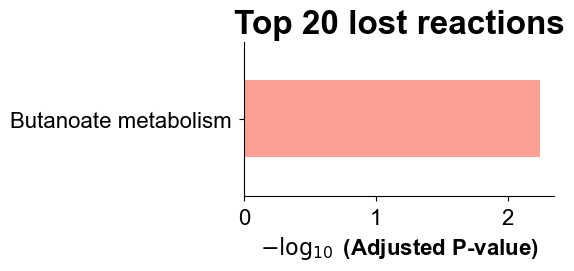

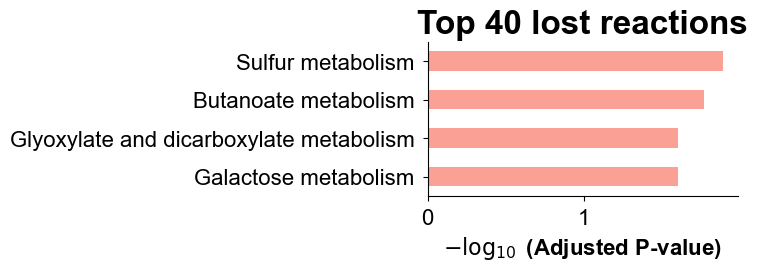

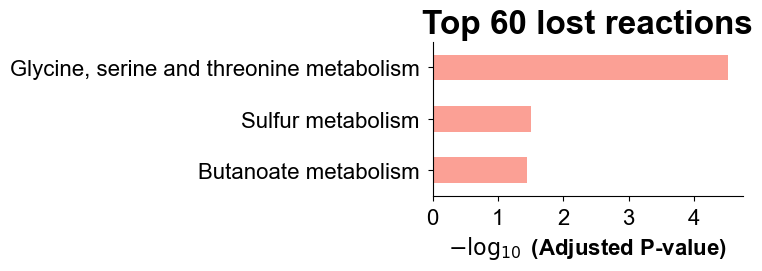

In [12]:
rxn_nums=[20,40,60]
# rxn_nums=[40]
for num in rxn_nums:
    rxnList=df_lost_count.index[:num].tolist()
    print(f'{num}th lost strains: {df_lost_count.iloc[num-1]}')
    enr_res=enr_analysis(rxnList,pathway_dict,background=None,title=f'Top {num} lost reactions')

### 3.check different lost reaction/gene in different clade

In [10]:
# select the clades that mean rxn size is significantly smaller than wildtype
from scipy import stats
sig_clades = []
for t in df_model_size['type'].unique():
    wt_mean = df_model_size[df_model_size['type']=='wildtype']['reaction_number'].mean()
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        mean= df_model_size[df_model_size['type']==t]['reaction_number'].mean()
        if p < 0.05 and mean<wt_mean:
            sig_clades.append(t)
            print(t, p, mean, wt_mean)

sig_clades=df_model_size['type'].unique()

M3. Mosaic region 3 0.005253267175305211 3996.6629213483147 4003.7837837837837
8. Mixed origin  6.062108922800536e-07 3990.6382978723404 4003.7837837837837
7. Mosaic beer  0.048675691368870656 3998.722222222222 4003.7837837837837
5. French dairy  6.694600820718942e-12 3982.576923076923 4003.7837837837837
3. Brazilian bioethanol  0.004787666142667739 3997.151515151515 4003.7837837837837
13. African palm wine  3.571667053011953e-05 3993.185185185185 4003.7837837837837
10. French Guiana human  1.066567363415345e-05 3993.4 4003.7837837837837
1. Wine/European (subclade 3) 0.001122390131018433 3994.2272727272725 4003.7837837837837


In [11]:
from scipy.stats import chi2_contingency

def extract_clade_strainList(clade,df_info):
    strainList=df_info[df_info['type']==clade].index.tolist()
    return strainList


def calculate_rxn_freq(rxnMatrix):
    '''Calculate the frequency of each rxn in the strainList'''
    rxn_freq=rxnMatrix.sum(axis=1)/len(rxnMatrix.columns)
    return rxn_freq

def calculate_chi_square(vector1,vector2):
    df_contingency = pd.crosstab(vector1, vector2)
    chi2, p, dof, expected = chi2_contingency(df_contingency)
    return p

def calculate_clade_chi(df,clade1_strainList,clade2_strainList):
    df_chi_result=pd.Series(index=df.index)
    for gene in df.index:
        presence_vector=df.loc[gene,clade1_strainList+clade2_strainList]
        label_vector=[1]*len(clade1_strainList)+[0]*len(clade2_strainList)
        p=calculate_chi_square(presence_vector,label_vector)
        df_chi_result[gene]=p
    return df_chi_result

def extract_clade_specific_reactions_by_chi(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,p_value_cutoff=0.05):
    ref_strainList=extract_clade_strainList(reference,df_info)
    clade_strainList=extract_clade_strainList(target_clade,df_info)

    df_chi=calculate_clade_chi(rxnMatrix,clade_strainList,ref_strainList)
    
    clade_specific_rxnList=df_chi[df_chi<p_value_cutoff].index.tolist()
    
    ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
    clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]

    ref_freq=calculate_rxn_freq(ref_rxnMatrix)
    clade_freq=calculate_rxn_freq(clade_rxnMatrix)
    df_freq=pd.DataFrame({'wildtype':ref_freq,target_clade:clade_freq})
    df_freq.fillna(0,inplace=True)

    clade_specific_lost_rxnList=[i for i in clade_specific_rxnList if df_freq.loc[i,'wildtype']>df_freq.loc[i,target_clade]]
    
    return clade_specific_lost_rxnList



def extract_clade_lost_rxn(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.9):
    ref_strainList=extract_clade_strainList(reference,df_info)
    ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]

    clade_strainList=extract_clade_strainList(target_clade,df_info)
    clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]

    ref_rxnList=ref_rxnMatrix.index[ref_rxnMatrix.sum(axis=1)>=len(ref_strainList)*threshold].tolist()
    clade_rxnList=clade_rxnMatrix.index[clade_rxnMatrix.sum(axis=1)>=len(clade_strainList)*(threshold-0.2)].tolist()
    # print(len(clade_strainList))

    lost_rxnList=[i for i in ref_rxnList if i not in clade_rxnList]

    return lost_rxnList


def extract_clade_lost_rxn2(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.2):
    ref_strainList=extract_clade_strainList(reference,df_info)
    ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
    ref_rxnfreq=calculate_rxn_freq(ref_rxnMatrix)

    clade_strainList=extract_clade_strainList(target_clade,df_info)
    clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]
    clade_rxnfreq=calculate_rxn_freq(clade_rxnMatrix)

    df_rxnfreq=pd.DataFrame({'wildtype':ref_rxnfreq,target_clade:clade_rxnfreq})
    df_rxnfreq.fillna(0,inplace=True)
    # define lost reaction as wildtype - target_clade > threshold
    lost_rxnList=df_rxnfreq[(df_rxnfreq['wildtype']-df_rxnfreq[target_clade])>threshold].index.tolist()
    add_rxnList=df_rxnfreq[(df_rxnfreq[target_clade]-df_rxnfreq['wildtype'])>threshold].index.tolist()

    return lost_rxnList,add_rxnList


clades_lost_rxn={}
# clades_add_rxn={}
for clade in sig_clades:
    # lost_rxnList=extract_clade_lost_rxn(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=1)
    # lost_rxnList,add_rxnList=extract_clade_lost_rxn2(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.3)
    lost_rxnList=extract_clade_specific_reactions_by_chi(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,p_value_cutoff=0.05)
    clades_lost_rxn[clade]=lost_rxnList
    # clades_add_rxn[clade]=add_rxnList
    print(clade,len(lost_rxnList))

wildtype 0
M3. Mosaic region 3 33
M2. Mosaic region 2 27
8. Mixed origin  44
7. Mosaic beer  13
5. French dairy  48
3. Brazilian bioethanol  28
26. Asian fermentation  21
25. Sake  33
2. Alpechin  27
13. African palm wine  39
10. French Guiana human  35
1. Wine/European (subclade 4) 33
1. Wine/European (subclade 3) 37
1. Wine/European (subclade 1) 41
1. Wine/European  29


In [12]:
# do pathway enrichment analysis for lost rxn
import gseapy as gp
from gseapy import barplot, dotplot
# load pathway dict
import cobra
model=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
pathway_dict={}
for group in model.groups:
    name=group.name
    # if 'Transport' in name:
    #     continue
    rxnIDlist=[rxn.id for rxn in group.members]
    pathway_dict[name]=rxnIDlist

# set wild type as background
wt_strainList=extract_clade_strainList('wildtype',df_info=df_model_size)
wtrxnMatrix=rxnMatrix.loc[:,wt_strainList]
# remove rows with all 0
wtrxnMatrix=wtrxnMatrix.loc[wtrxnMatrix.sum(axis=1)>0,:]
background=wtrxnMatrix.index.tolist()


def enr_analysis(rxnList,pathway_dict,background=None,cutoff=0.05):
    enr=gp.enrich(gene_list=rxnList, # or gene_list=glist
                 gene_sets=pathway_dict,
                 background=background, 
                 outdir=None,
                 verbose=None)
    result=enr.res2d
    result=result[result['Adjusted P-value']<cutoff]
    # set Term as index
    result=result.set_index('Term')
    return result

In [19]:
# do enrichment analysis for each clade
df_clades_score=pd.DataFrame(index=pathway_dict.keys())
df_clades_pvalue=pd.DataFrame()
for clade in clades_lost_rxn.keys():
    print(clade,len(clades_lost_rxn[clade]))
    try:
        result=enr_analysis(clades_lost_rxn[clade],pathway_dict,background=background,cutoff=0.05)
        # print(result)
        df_clades_score[clade]=result['Combined Score']
        df_clades_pvalue[clade]=result['Adjusted P-value']
    except:
        pass

# remove all nan rows
df_clades_score=df_clades_score.dropna(how='all')
# fill all nan with 0
df_clades_score=df_clades_score.fillna(0)

# remove rows with index contain Transport
df_clades_score=df_clades_score[~df_clades_score.index.str.contains('Transport')]

# remove columns with all value is 0
df_clades_score = df_clades_score.loc[:, (df_clades_score != 0).any(axis=0)]
# save df_clades_score
# df_clades_score.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/clade_lost_rxn_enrichment_analysis.csv')
df_clades_score

wildtype 0
M3. Mosaic region 3 33
M2. Mosaic region 2 27
8. Mixed origin  44
7. Mosaic beer  13
5. French dairy  48
3. Brazilian bioethanol  28
26. Asian fermentation  21
25. Sake  33
2. Alpechin  27
13. African palm wine  39
10. French Guiana human  35
1. Wine/European (subclade 4) 33
1. Wine/European (subclade 3) 37
1. Wine/European (subclade 1) 41
1. Wine/European  29


,M3. Mosaic region 3,8. Mixed origin,7. Mosaic beer,5. French dairy,3. Brazilian bioethanol,26. Asian fermentation,25. Sake,2. Alpechin,13. African palm wine,10. French Guiana human,1. Wine/European (subclade 4),1. Wine/European (subclade 3)
Butanoate metabolism,0.000000,0.000000,0.000000,306.125362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Exchange reaction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.408366,0.000000,0.000000,0.000000,0.000000
Fructose and mannose metabolism,152.709619,266.969931,566.569425,0.000000,509.623618,0.000000,152.709619,202.843291,0.000000,0.000000,0.000000,0.000000
Oxidative phosphorylation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.653695,0.000000,0.000000,0.000000
Pentose and glucuronate interconversions,0.000000,0.000000,0.000000,0.000000,334.880719,0.000000,267.108219,352.020269,0.000000,0.000000,0.000000,0.000000
Phenylalanine metabolism,267.108219,0.000000,0.000000,0.000000,334.880719,496.684695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Starch and sucrose metabolism,421.286399,133.711134,0.000000,716.254296,538.787740,0.000000,205.331037,0.000000,328.215677,385.826054,421.286399,355.085095
Sulfur metabolism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.294150,0.000000,0.000000,0.000000
Tryptophan metabolism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.815399,0.000000,0.000000


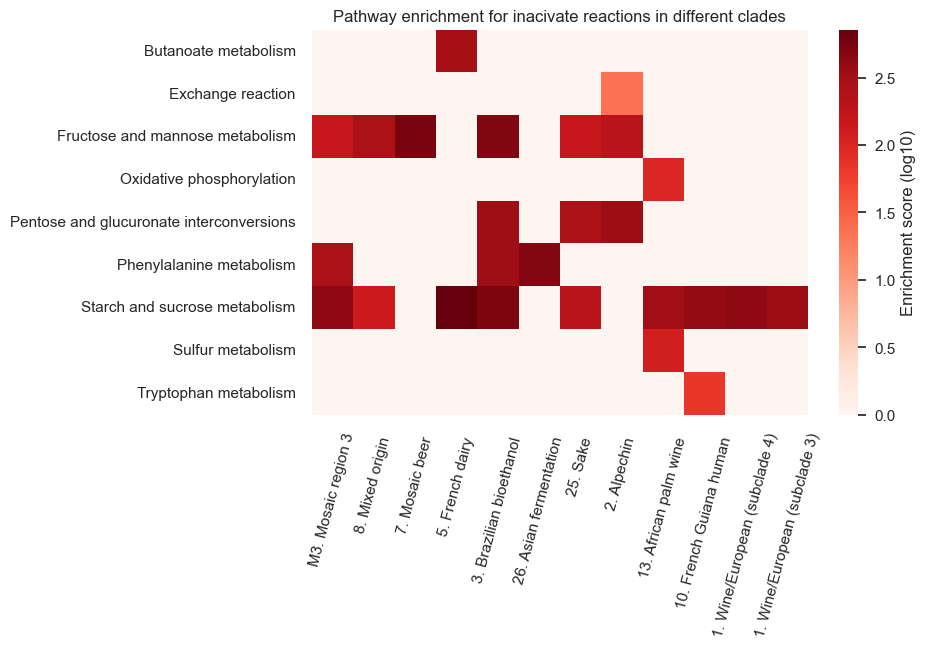

In [20]:
# plot the enrichment score as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# set font style as Arial
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8, 5))
df_clades_score_log=np.log10(df_clades_score+1)
sns.heatmap(df_clades_score_log, cmap="Reds")
plt.title('Pathway enrichment for inacivate reactions in different clades')
plt.xticks(rotation=75)
# # set color bar title
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Enrichment score (log10)')
plt.show()

### 3. Fluxes vs expression correlation analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from scipy.stats import pearsonr
import random

os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [8]:
#load data
# expression data
expressionMatrix=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\sce969_rxn_expressionMatrix_normalized.csv',index_col=0)
# flux data
fluxMatrix=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/fix_growth0.5_tinit_fba_fluxes_shrinked.csv',index_col=0)

# normalize flux data
# fluxMatrix=fluxMatrix.div(fluxMatrix.loc['r_1714',:],axis=1)*(-100)
fluxMatrix=fluxMatrix.loc[:,fluxMatrix.loc['r_2111',:]>0]
# fill the NaN value with 0
fluxMatrix=fluxMatrix.fillna(0)
# set absolute value of fluxes
fluxMatrix=fluxMatrix.abs()

# remove rows that 99% values are 0
expressionMatrix=expressionMatrix.loc[(expressionMatrix.T!=0).sum()>0.01*expressionMatrix.shape[1],:]
fluxMatrix=fluxMatrix.loc[(fluxMatrix.T!=0).sum()>0.01*fluxMatrix.shape[1],:]

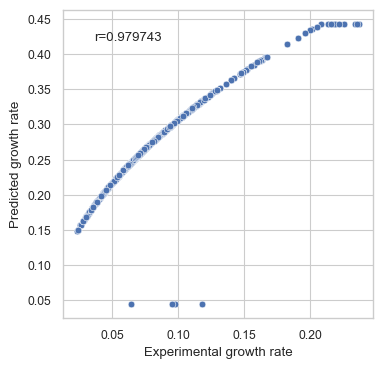

In [9]:
# evaluate the predicted growth rate with the experimental data
growth='r_2111'
pre_growth = fluxMatrix.loc[growth, :]
# remove 0 value
pre_growth = pre_growth[pre_growth != 0]
# load experimental growth rate
# load growth data
df_exp_data = pd.read_csv('data/transcriptomics/combined_969growth_data.csv', index_col=0)
# remove rows with genome_id is NaN
df_exp_data = df_exp_data[df_exp_data['genome_id'].notnull()]
# set genome_id as index
df_exp_data = df_exp_data.set_index('genome_id')
exp_growth = df_exp_data['t_mid_norm']

df_growth=pd.DataFrame(index=pre_growth.index)
df_growth['pre']=pre_growth
df_growth['exp']=df_growth.index.map(exp_growth)
# remove rows with NaN
df_growth=df_growth[df_growth['exp'].notnull()]
# remove predicted growth rate < 0.15
# df_growth=df_growth[df_growth['pre']>0.15]
df_growth['exp']=1/df_growth['exp']

# plot the predicted vs experimental growth rate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('paper')
plt.figure(figsize=(4,4))
sns.scatterplot(x='exp',y='pre',data=df_growth)
plt.xlabel('Experimental growth rate')
plt.ylabel('Predicted growth rate')
# calculate the correlation coefficient
from scipy.stats import spearmanr
r,p=spearmanr(df_growth['exp'],df_growth['pre'])
plt.text(0.1,0.9,'r=%f' %r,transform=plt.gca().transAxes)
plt.show()

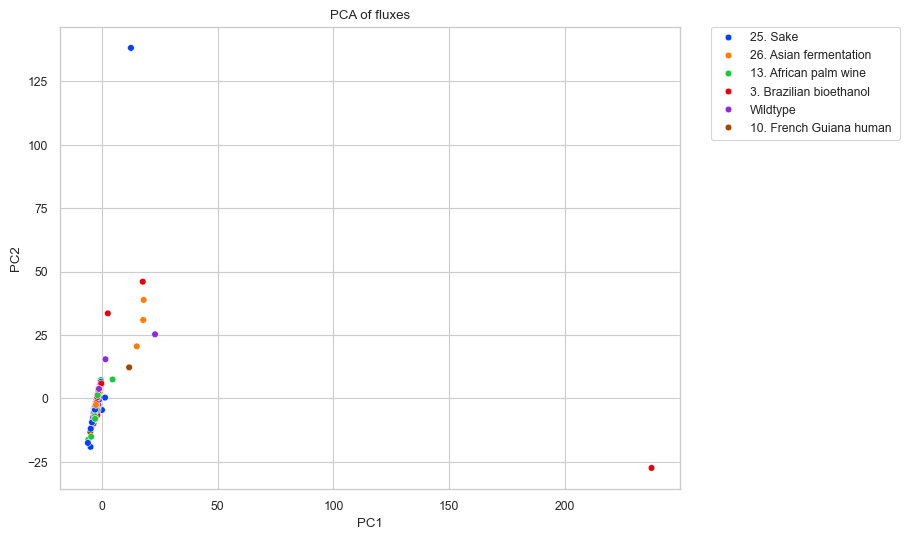

In [10]:
# plot the PCA of the flux data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data=fluxMatrix.T
# load all strain info
df_strain_info=pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)
# remove duplicated index
df_strain_info=df_strain_info[~df_strain_info.index.duplicated()]
data['Type']=df_strain_info['nature_clade']
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
data['Type']=data['Type'].apply(lambda x: 'Wildtype' if x in wildtypelist else x)
keep_clades=data['Type'].value_counts().index[(data['Type'].value_counts()>15)&(data['Type'].value_counts()<40)].tolist()
to_ignores=['1. Wine/European (subclade 4)','1. Wine/European (subclade 3)','8. Mixed origin ']
keep_clades=[x for x in keep_clades if x not in to_ignores]
data=data[data['Type'].isin(keep_clades)]

x1 = StandardScaler().fit_transform(data.drop('Type',axis=1))

# PCA
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)

# plot
fig,ax=plt.subplots(figsize=(8,6))
# plot geneMatrix
pca_fluxes=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_fluxes['Type']=data['Type'].values
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes,ax=ax,palette='bright')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
# set title
ax.set_title('PCA of fluxes')

# set legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
common_strains=expressionMatrix.columns.intersection(fluxMatrix.columns)
common_rxns=expressionMatrix.index.intersection(fluxMatrix.index)

expressionMatrix=expressionMatrix.loc[common_rxns,common_strains]
fluxMatrix=fluxMatrix.loc[common_rxns,common_strains]

# z-score normalization
def z_score_convert(df):
    return df.apply(lambda x:(x-x.mean())/x.std(),axis=1)

flux_z_Matrix=z_score_convert(fluxMatrix)
expression_z_Matrix=z_score_convert(expressionMatrix)
# flux_z_Matrix=fluxMatrix
# expression_z_Matrix=expressionMatrix

# remove rows that 99% values are NaN
expression_z_Matrix=expression_z_Matrix.loc[(expression_z_Matrix.T.isna()).sum()<0.01*expression_z_Matrix.shape[1],:]
flux_z_Matrix=flux_z_Matrix.loc[(flux_z_Matrix.T.isna()).sum()<0.01*flux_z_Matrix.shape[1],:]

common_strains=expression_z_Matrix.columns.intersection(flux_z_Matrix.columns)
common_rxns=expression_z_Matrix.index.intersection(flux_z_Matrix.index)

expression_z_Matrix=expression_z_Matrix.loc[common_rxns,common_strains]
flux_z_Matrix=flux_z_Matrix.loc[common_rxns,common_strains]

In [12]:
# calculate the correlation between flux and expression
def calculate_correlation(df1,df2):
    common_rxnList=df1.index.intersection(df2.index)
    
    df_correlation=pd.DataFrame(index=common_rxnList,columns=['correlation','p-value'])
    for rxn in common_rxnList:
        # option 1: use pearsonr correlation
        # df_correlation.loc[rxn,'correlation'],df_correlation.loc[rxn,'p-value']=pearsonr(df1.loc[rxn,:],df2.loc[rxn,:])
        # option 2: use spearman correlation
        from scipy.stats import spearmanr
        df_correlation.loc[rxn,'correlation'],df_correlation.loc[rxn,'p-value']=spearmanr(df1.loc[rxn,:],df2.loc[rxn,:])

    df_correlation=df_correlation.astype(float)
    # fill nan value with 0 in correlation column
    df_correlation['correlation']=df_correlation['correlation'].fillna(0)

    # fill p-value > 0.05 with 0 in correlation column
    # df_correlation=df_correlation.loc[df_correlation['p-value']<0.05,:]
    df_correlation.loc[df_correlation['p-value']>0.05,'correlation']=0
    return df_correlation

flux_expression_r=calculate_correlation(flux_z_Matrix,expression_z_Matrix)

flux_expression_r['correlation'].describe()

d:\softwares\programming\anoconda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


count    1351.000000
mean        0.002071
std         0.028201
min        -0.139184
25%         0.000000
50%         0.000000
75%         0.000000
max         0.154813
Name: correlation, dtype: float64